# MNIST Digit Classification using Fully Connected Network and Convolutional Neural Network

This repository contains a PyTorch implementation of image classification using the MNIST dataset. It includes both a fully connected neural network (FCN) and a convolutional neural network (CNN) for the task of digit recognition.

## Setup

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9) and is commonly used for machine learning experiments. It is divided into a training set and a test set, both of which are used for training and evaluating the models.

In [ ]:
import random
from base64 import b64decode as dec

import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# ### Include HERE any additionally needed libary
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# ### Load the mnist dataset
#train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transforms.ToTensor())
#test_dataset = datasets.MNIST('../data', train=False, transform=transforms.ToTensor())
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='data', train=False, transform=transforms.ToTensor())

In [ ]:
print('Train:', len(train_dataset))
print('Test:',len(test_dataset))

Train: 60000
Test: 10000


In [ ]:
# Print the shape of the first image of the train_dataset, and it's label
first_image, first_label = train_dataset[0]
print("Shape of the first image:", first_image.shape)
print("Label of the first image:", first_label)

Shape of the first image: torch.Size([1, 28, 28])
Label of the first image: 5


1


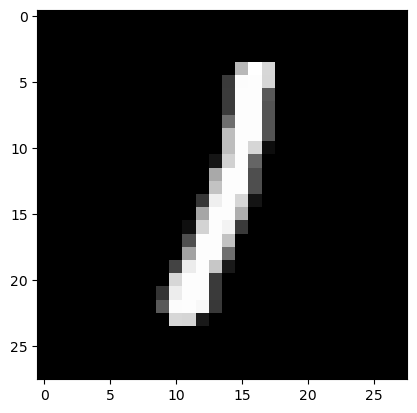

In [ ]:
# ### Visualize a random sample
x, y = train_dataset[random.randint(0, len(train_dataset))]
plt.imshow(np.squeeze(x), cmap='gray')
print(y)

# Models

## Hyperparameters

In [ ]:
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(DEVICE)
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")

print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")
# ### Alter hyperparameters so that they suite the problem the best
BATCH_SIZE = 64
LR = 1e-3
EPOCHS = 20

cuda:0
Is CUDA supported by this system? True
CUDA version: 12.1
ID of current CUDA device:0
Name of current CUDA device:NVIDIA GeForce 940MX


## Fully Connected Model

The FCN consists of fully connected layers with dropout for regularization. You can customize the architecture by adjusting the number of layers and neurons per layer.

In [ ]:
class MyModel(nn.Module):
    def __init__(self, input_size, layer_size1, layer_size2, layer_size3, layer_size4, dropout=0.3):
        super(MyModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, layer_size1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size1, layer_size2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size2, layer_size3),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size3, layer_size4),
            nn.ReLU(),
            nn.Linear(layer_size4, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

"""
4 layers without dropout, CrossEntropy, ADAM - Loss: 0.49702330082654955, Accuracy: 83.60%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50

4 layers with dropout 0.25, CrossEntropy, ADAM - Loss: 0.30366133227944375, Accuracy: 93.51%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50

4 layers without dropout, NLLEntropy, SGD - Loss: 0.09716107309795916, Accuracy: 97.30%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50

4 layers with dropout 0.25, NLLEntropy, SGD - train loss: 9.49070326237282e-06, test loss: 0.08662979249085395, Accuracy: 98.16%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50

4 layers with dropout 0.3, NLLEntropy, SGD - train loss: 8.887386144097171e-05, test loss: 0.076891, Accuracy: 98.48%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50
"""

'\n4 layers without dropout, CrossEntropy, ADAM - Loss: 0.49702330082654955, Accuracy: 83.60%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50\n\n4 layers with dropout 0.25, CrossEntropy, ADAM - Loss: 0.30366133227944375, Accuracy: 93.51%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50\n\n4 layers without dropout, NLLEntropy, SGD - Loss: 0.09716107309795916, Accuracy: 97.30%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50\n\n4 layers with dropout 0.25, NLLEntropy, SGD - train loss: 9.49070326237282e-06, test loss: 0.08662979249085395, Accuracy: 98.16%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50\n\n4 layers with dropout 0.3, NLLEntropy, SGD - train loss: 8.887386144097171e-05, test loss: 0.076891, Accuracy: 98.48%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50\n'

## Convolutional Model

In [ ]:
#✔️ TODO: customize the MyCNNModel class to be able to tweak number of layers/neurons
#       per layer & regularization so that you can test multiple hypotheses.
#
#       The final network should contain at least 2 convolutional layers, one
#       linear layer. Use activation functions after every convolutional layer.
#       Hint: start simple, and incrementally add complexity. Keep track of your
#       iterations by utilizing comments.

class MyCNNModel(nn.Module):
    def __init__(self):
        super(MyCNNModel, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size = 5), #24x24
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2), #12x12
            nn.Conv2d(32, 64, kernel_size = 5), #8x8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2), #4x4
            nn.Flatten(),
            nn.Linear(64* 4* 4, 10)
            )

    def forward(self, x):
        return self.model(x)

"""
2 Convolational layers (256 -> 512) and 1 linear layer with dropout NLL, and SGD = train loss: 0.0001068090742572825, test Loss: 0.028232653439044953, Accuracy: 99.03%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50

2 Convolational layers (32 -> 64) and 1 linear layer Cross Entropy, and Adam = train loss: 3.0598625528818763e-07, test Loss: 0.04190599122453387, Accuracy: 99.34%, BATCH_SIZE = 64, LR = 1e-3, EPOCHS = 20

"""

'\n2 Convolational layers (256 -> 512) and 1 linear layer with dropout NLL, and SGD = train loss: 0.0001068090742572825, test Loss: 0.028232653439044953, Accuracy: 99.03%, BATCH_SIZE = 256, LR = 0.025, EPOCHS = 50\n\n2 Convolational layers (32 -> 64) and 1 linear layer Cross Entropy, and Adam = train loss: 3.0598625528818763e-07, test Loss: 0.04190599122453387, Accuracy: 99.20%, BATCH_SIZE = 64, LR = 1e-3, EPOCHS = 20\n\n'

In [ ]:
# Based on LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2), # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2), # 14*14

            nn.Conv2d(6, 16, kernel_size=5, stride=1), # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5

            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )

    def forward(self, x):
        return self.model(x)

## Train & Evaluation

In [ ]:
def train(model, crit, opt, epochs, train_loader) -> None:
    print("# ### TRAIN")
    """function to perform the training process, using the defined model, criterion
    and optimizer objects. Prints train loss evolution at specific epoch increments
    and plots at the end of the loss throughout every epoch

    :param model: ML model instance extending nn.Module class
    :param crit: criterion, nn.*Loss() instance
    :param opt: optimizer, nn.optim.* instance
    :param train_loader: torch DataLoader instance containing training samples
    :return: None"""
    train_losses = []

    model.to('cuda:0')
    #✔️ TODO: prep model for training
    model.train()

    for epoch in range(epochs):
        losses = 0
        for images, labels in train_loader:
            opt.zero_grad()
            y_hat = model(images.to('cuda:0'))
            loss = crit(y_hat, labels.to('cuda:0'))

            #✔️ TODO: make the necessary update for the loss and optimizer
            loss.backward() # the model learns by backpropagating by calculating gradients
            opt.step() # And optimizes its weights here and update parameter after every iteration (gradient descent step)
            losses += loss.item()

        train_loss = losses / len(train_loader)
        train_losses.append(train_loss)
        if epoch != 0:
            print('Epoch: [{}/{}] - train loss: {}'.format(epoch, epochs, train_loss))

    # plot the process of training, visualizing losses
    plt.plot(range(0, len(train_losses)), train_losses)
    plt.show()

    avg_train_loss = losses / len(train_loader)
    return avg_train_loss

In [ ]:
def test(model, crit, test_loader) -> None:
    print("# ### TEST")
    """function to perform the evaluation process, using the defined model and
    criterion. Prints test loss, overall accuracy and class-wise accuracy for
    samples of the test dataset.

    :param model: ML model instance extending nn.Module class
    :param crit: criterion, nn.*Loss() instance
    :param test_loader: torch DataLoader instance containing testing samples
    :return: None"""
    test_loss = 0

    # dictionaries used to evaluate for each class the accuracy of the model
    total_predictions = [0 for i in range(0, 10)]
    correct_predictions = [0 for i in range(0, 10)]

    total_preds = []
    total_labels = []

    model.to('cpu')
    #✔️ TODO: prep model for evaluation
    model.eval()

    for images, labels in test_loader:
        y_hat = model(images) #
        _, pred = torch.max(y_hat, 1)  #✔️ TODO why is this needed here? - Stores the indices of maximum value
        loss = criterion(y_hat, labels)

        test_loss += loss.item()

        for idx, gt in enumerate(labels):
            #✔️ TODO: increment the total_predictions list at the index of the ground truth label
            total_predictions[gt] += 1
            if pred[idx] == gt:
              correct_predictions[gt] += 1

        #for confusion matrix
        total_preds.extend(pred.tolist())
        total_labels.extend(labels.tolist())

    print('-' * 25)
    print('Loss:', test_loss / len(test_loader))
    print('Accuracy: {:.2f}%'.format(sum(correct_predictions) / sum(total_predictions) * 100))
    print('-' * 25)
    for i in range(0, 10):
        print('Label {}: {:.2f}% acc - {} presences'.format(i, correct_predictions[i] / total_predictions[i] * 100, total_predictions[i]))

    avg_test_loss = test_loss / len(test_loader)
    return avg_test_loss, total_preds, total_labels

## Training and evaluation process

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True) #combines the data-set and a sampler and provides single- or multi-process iterators over the data-set, shuffle helps to generalize the network
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

<bound method Module.parameters of MyModel(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=264, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=264, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.25, inplace=False)
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.25, inplace=False)
    (10): Linear(in_features=64, out_features=28, bias=True)
    (11): ReLU()
    (12): Linear(in_features=28, out_features=10, bias=True)
    (13): LogSoftmax(dim=1)
  )
)>
# ### TRAIN
Epoch: [1/50] - train loss: 0.0001425150074938467
Epoch: [2/50] - train loss: 0.0001626738321298221
Epoch: [3/50] - train loss: 8.257724710110662e-05
Epoch: [4/50] - train loss: 0.00010786048257783024
Epoch: [5/50] - train loss: 0.00016144524886409865
Epoch: [6/50] - train loss: 3.5766472440284454e-05
Epoch: [7/50] - train loss: 0.0001096163810824534

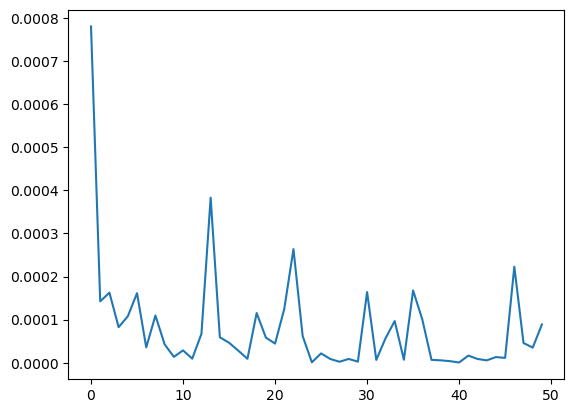

# ### TEST
-------------------------
Loss: 0.07689180006859801
Accuracy: 98.41%
-------------------------
Label 0: 99.18% acc - 980 presences
Label 1: 99.38% acc - 1135 presences
Label 2: 98.74% acc - 1032 presences
Label 3: 98.81% acc - 1010 presences
Label 4: 98.78% acc - 982 presences
Label 5: 97.65% acc - 892 presences
Label 6: 98.33% acc - 958 presences
Label 7: 98.15% acc - 1028 presences
Label 8: 97.43% acc - 974 presences
Label 9: 97.42% acc - 1009 presences


In [ ]:
FCModel = MyModel(784, 264, 128, 64, 28)
print(FCModel.parameters)

#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
#optimizer = torch.optim.Adam(FCModel.parameters(), lr=LR)
optimizer = torch.optim.SGD(FCModel.parameters(), lr=LR, momentum = 0.5)

# ###
train_losses = train(
    model=FCModel,
    crit=criterion,
    opt=optimizer,
    epochs=EPOCHS,
    train_loader=train_loader
)
test_losses, total_preds, total_labels = test(
    model=FCModel,
    crit=criterion,
    test_loader=test_loader
)

FCModel_LogSoftmax_NLL_SGD_Dropout_train_loss = train_losses
FCModel_LogSoftmax_NLL_SGD_Dropout_test_loss = test_losses
FCModel_LogSoftmax_NLL_SGD_Dropout_total_preds = total_preds
FCModel_LogSoftmax_NLL_SGD_Dropout_total_labels = total_labels
torch.save({
    'model_state_dict': FCModel.state_dict(),
    'test_losses': test_losses,
    'total_preds': total_preds,
    'total_labels': total_labels}, 'FCModel_LogSoftmax_NLL_SGD_Dropout.pth')

<bound method Module.parameters of MyCNNModel(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1600, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.5, inplace=False)
    (10): Linear(in_features=128, out_features=10, bias=True)
    (11): LogSoftmax(dim=1)
  )
)>
# ### TRAIN
Epoch: [1/20] - train loss: 5.23673946351639e-06
Epoch: [2/20] - train loss: 0.0001626691616166121
Epoch: [3/20] - train loss: 4.407068861445893e-05
Epoch: [4/20] - train loss: 2.745557628544186e-07
Epoch: [5/20] - train loss: 5.974381892030427e-05
Epoch: [6/20] - train loss: 9.40381027043247e-06
Epoch: [7/20] - train loss: 3.000495454935885e

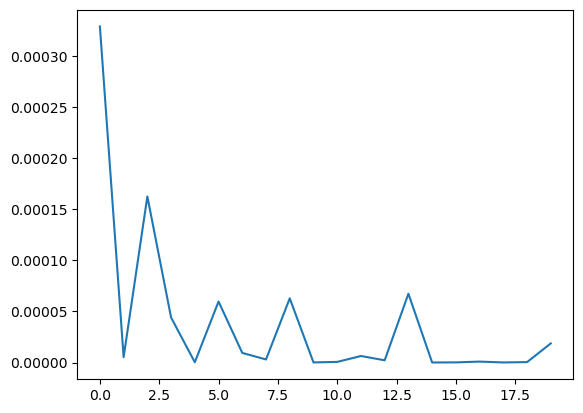

# ### TEST
-------------------------
Loss: 0.02673319313783737
Accuracy: 99.34%
-------------------------
Label 0: 99.69% acc - 980 presences
Label 1: 99.74% acc - 1135 presences
Label 2: 99.71% acc - 1032 presences
Label 3: 99.41% acc - 1010 presences
Label 4: 99.19% acc - 982 presences
Label 5: 99.33% acc - 892 presences
Label 6: 99.27% acc - 958 presences
Label 7: 99.12% acc - 1028 presences
Label 8: 98.87% acc - 974 presences
Label 9: 99.01% acc - 1009 presences


In [ ]:
CNNModel = MyCNNModel()
print(CNNModel.parameters)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNModel.parameters(), lr=LR)

# ###
avg_train_loss = train(
    model=CNNModel,
    crit=criterion,
    opt=optimizer,
    epochs=EPOCHS,
    train_loader=train_loader
)
avg_test_loss, total_preds, total_labels = test(
    model=CNNModel,
    crit=criterion,
    test_loader=test_loader
)

CNNModel_CrossEntropy_Adam_train_loss = avg_train_loss
CNNModel_CrossEntropy_Adam_test_loss = avg_test_loss
CNNModel_CrossEntropy_Adam_total_preds = total_preds
CNNModel_CrossEntropy_Adam_total_labels = total_labels
torch.save({
    'model_state_dict': CNNModel.state_dict(),
    'test_losses': test_losses,
    'total_preds': total_preds,
    'total_labels': total_labels}, 'CNNModel_CrossEntropy_Adam.pth')